In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
c = sns.load_dataset('car_crashes')
c.head()

,total,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses,abbrev
0,18.8,7.332,5.640,18.048,15.040,784.55,145.08,AL
1,18.1,7.421,4.525,16.290,17.014,1053.48,133.93,AK
2,18.6,6.510,5.208,15.624,17.856,899.47,110.35,AZ
3,22.4,4.032,5.824,21.056,21.280,827.34,142.39,AR
4,12.0,4.200,3.360,10.920,10.680,878.41,165.63,CA


In [3]:
c.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51 entries, 0 to 50
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   total           51 non-null     float64
 1   speeding        51 non-null     float64
 2   alcohol         51 non-null     float64
 3   not_distracted  51 non-null     float64
 4   no_previous     51 non-null     float64
 5   ins_premium     51 non-null     float64
 6   ins_losses      51 non-null     float64
 7   abbrev          51 non-null     object 
dtypes: float64(7), object(1)
memory usage: 3.3+ KB


In [4]:
x=c.iloc[:,1:-1]
x.head()

,speeding,alcohol,not_distracted,no_previous,ins_premium,ins_losses
0,7.332,5.640,18.048,15.040,784.55,145.08
1,7.421,4.525,16.290,17.014,1053.48,133.93
2,6.510,5.208,15.624,17.856,899.47,110.35
3,4.032,5.824,21.056,21.280,827.34,142.39
4,4.200,3.360,10.920,10.680,878.41,165.63


In [5]:
y = c['total']
y[:3]

,total
0,18.8
1,18.1
2,18.6


In [6]:
from sklearn.feature_selection import mutual_info_regression

In [7]:
score = mutual_info_regression(x,y)

In [8]:
score

array([0.30908805, 0.63744239, 1.11657206, 1.07198114, 0.0977748 ,
       0.        ])

In [9]:
len(score)

6

In [10]:
score

array([0.30908805, 0.63744239, 1.11657206, 1.07198114, 0.0977748 ,
       0.        ])

In [11]:
imp_fea = pd.DataFrame(score,columns=['scores'])

In [12]:
imp_fea

,scores
0,0.309088
1,0.637442
2,1.116572
3,1.071981
4,0.097775
5,0.000000


In [14]:
df_columns = pd.DataFrame(c.columns,columns=['features'])
df_columns

,features
0,total
1,speeding
2,alcohol
3,not_distracted
4,no_previous
5,ins_premium
6,ins_losses
7,abbrev


In [15]:
new_feat = pd.concat([imp_fea,df_columns],axis = 1)

In [16]:
new_feat

,scores,features
0,0.309088,total
1,0.637442,speeding
2,1.116572,alcohol
3,1.071981,not_distracted
4,0.097775,no_previous
5,0.000000,ins_premium
6,NaN,ins_losses
7,NaN,abbrev


In [17]:
new_feat = new_feat.nlargest(20,'scores')

In [18]:
new_feat

,scores,features
2,1.116572,alcohol
3,1.071981,not_distracted
1,0.637442,speeding
0,0.309088,total
4,0.097775,no_previous
5,0.000000,ins_premium
6,NaN,ins_losses
7,NaN,abbrev


<Axes: ylabel='features'>

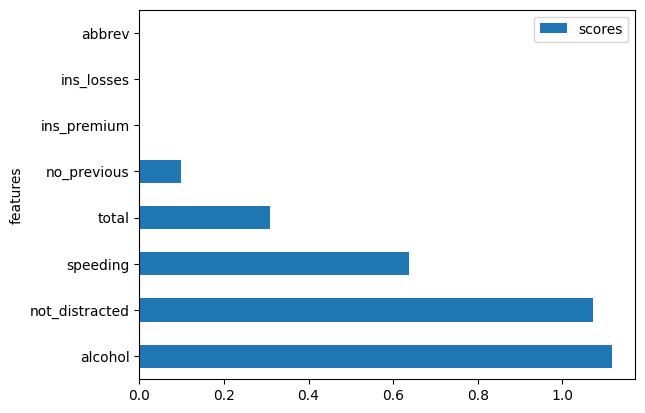

In [20]:
new_feat.plot(kind='barh',x='features',y='scores')

In [27]:
from sklearn.feature_selection import RFE

In [21]:
from sklearn.linear_model import LinearRegression

In [25]:
lr =  LinearRegression()

In [28]:
rf_new = RFE(estimator=lr,n_features_to_select=5)

In [29]:
rf_new


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [32]:
rf_new.fit(x,y)


RFE(estimator=LinearRegression(), n_features_to_select=5)

In [33]:
rf_new.n_features_

5

In [34]:
rf_new.estimator_

LinearRegression()

In [35]:
rf_new.support_

array([ True,  True,  True,  True, False,  True])

In [36]:
rf_new.ranking_

array([1, 1, 1, 1, 2, 1])

In [37]:
rf_new.fit_transform(x,y)

array([[  7.332,   5.64 ,  18.048,  15.04 , 145.08 ],
       [  7.421,   4.525,  16.29 ,  17.014, 133.93 ],
       [  6.51 ,   5.208,  15.624,  17.856, 110.35 ],
       [  4.032,   5.824,  21.056,  21.28 , 142.39 ],
       [  4.2  ,   3.36 ,  10.92 ,  10.68 , 165.63 ],
       [  5.032,   3.808,  10.744,  12.92 , 139.91 ],
       [  4.968,   3.888,   9.396,   8.856, 167.02 ],
       [  6.156,   4.86 ,  14.094,  16.038, 151.48 ],
       [  2.006,   1.593,   5.9  ,   5.9  , 136.05 ],
       [  3.759,   5.191,  16.468,  16.826, 144.18 ],
       [  2.964,   3.9  ,  14.82 ,  14.508, 142.8  ],
       [  9.45 ,   7.175,  14.35 ,  15.225, 120.92 ],
       [  5.508,   4.437,  13.005,  14.994,  82.75 ],
       [  4.608,   4.352,  12.032,  12.288, 139.15 ],
       [  3.625,   4.205,  13.775,  13.775, 108.92 ],
       [  2.669,   3.925,  15.229,  13.659, 114.47 ],
       [  4.806,   4.272,  13.706,  15.13 , 133.8  ],
       [  4.066,   4.922,  16.692,  16.264, 137.13 ],
       [  7.175,   6.765,  1

In [38]:
x.loc[:,rf_new.support_][:3]

,speeding,alcohol,not_distracted,no_previous,ins_losses
0,7.332,5.640,18.048,15.040,145.08
1,7.421,4.525,16.290,17.014,133.93
2,6.510,5.208,15.624,17.856,110.35


In [39]:
from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()

In [40]:
rfe_dt = RFE(estimator=dtr,n_features_to_select=5)
rfe_dt.fit(x,y)

RFE(estimator=DecisionTreeRegressor(), n_features_to_select=5)

In [41]:
from sklearn.feature_selection import SelectKBest

In [42]:
sk = SelectKBest(score_func=mutual_info_regression,k=5)
sk

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7f749086b740>)

In [43]:
sk.fit(x,y)

SelectKBest(k=5, score_func=<function mutual_info_regression at 0x7f749086b740>)

In [44]:
sk.scores_

array([0.31895422, 0.63809598, 1.11828385, 1.07527245, 0.10538196,
       0.        ])

In [46]:
final = pd.concat([pd.DataFrame(sk.scores_,columns=['score']),pd.DataFrame(x.columns,columns=['features'])],axis=1)
final[:]

,score,features
0,0.318954,speeding
1,0.638096,alcohol
2,1.118284,not_distracted
3,1.075272,no_previous
4,0.105382,ins_premium
5,0.000000,ins_losses


In [47]:
final.nlargest(5,'score')

,score,features
2,1.118284,not_distracted
3,1.075272,no_previous
1,0.638096,alcohol
0,0.318954,speeding
4,0.105382,ins_premium
